# Linear regression

This exercise uses the diabetes dataset, a set of features that can be used to predict the evolution of diabetes. 
We will use a linear regression model.

## Dataset Characteristics

* Number of Instances: 442
* Number of Attributes: First 10 columns are numeric predictive values
* Features Information:

        age: age in years
        sex: sex
        bmi: body mass index
        bp: average blood pressure
        s1: tc, total serum cholesterol
        s2: ldl, low-density lipoproteins
        s3: hdl, high-density lipoproteins
        s4: tch, total cholesterol / HDL
        s5: ltg, possibly log of serum triglycerides level
        s6. glu, blood sugar level

    **Note**: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

* Target: Column 11 is a quantitative measure of disease progression one year after baseline

## Dataset source
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html 

## Guided steps
### 1. Load the dataset

Load the dataset as pandas dataframes.

In [12]:
import pandas as pd
from sklearn.datasets import load_diabetes

In [34]:
X, y = load_diabetes(as_frame=True, return_X_y=True)
print(X.head())
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


### Split into training and test sets

For now, let's use only one feature: bmi. Create a new dataframe with only this feature, and split it into training (80%) and test (20%) sets.

**Note**: to split the data, you can use the function `train_test_split` from `sklearn.model_selection`. What advantage does this function have over simply slicing the dataframe?

In [53]:
# Code here
from sklearn.model_selection import train_test_split

bmi_feature = X['bmi'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(bmi_feature, y, train_size=0.8)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (353, 1)
X_test shape: (89, 1)
y_train shape: (353,)
y_test shape: (89,)


### Load and train the model

Load the linear regression model from `sklearn.linear_model` and train it with the training data.

In [54]:
# Code here
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Evaluate the model

Evaluate the model using the test data. You can use the functions `mean_squared_error` and `r2_score` (the coefficient of determination) from `sklearn.metrics`.

In [55]:
# Code here
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 3671.8153433490215
R-squared (R²) Score: 0.4572649529337526


### Plot the results with matplotlib

Plot the test data as a scatter plot, and the predictions as a line. 

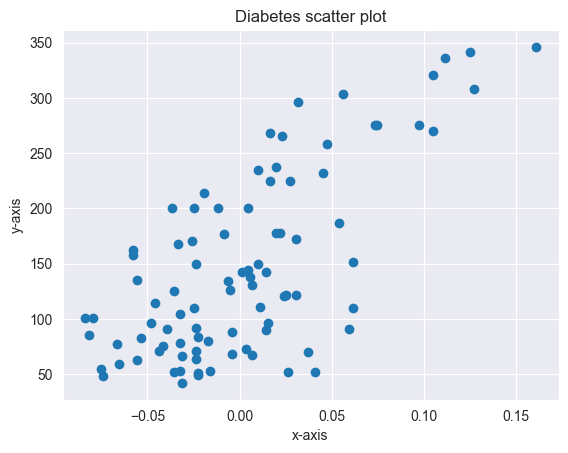

In [57]:
# Code here
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Diabetes scatter plot")
plt.show()

### 2. Multivariate linear regression

Check the values from the previous step of model evaluation. Is the model good? What do these metrics mean? Do the model scores change much if you run the code again (remember that the training and test sets are randomly selected, so it makes sense for the scores to change a bit)?

In this section we will use all the features from the dataset:

* Split the data (all the features) into training (80%) and test (20%) sets again
* Train the model with the training data.
* Evaluate the model with the test data.

What do you observe? Is the model performance better? Do you think that all the features are useful for the prediction? Why?

In [101]:
# Code here

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)

Mean Squared Error (MSE): 2560.561206319704
R-squared (R²) Score: 0.5979857766013128
